# Exploratory Data Analysis (EDA)

Exploratory notebook to understand features and their relationship to the target variable.

In [1]:
%reload_ext autoreload
%autoreload 1

In [2]:
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.process import load_train_test

In [20]:
import warnings
warnings.simplefilter("ignore")

### Global Params

In [18]:
LABEL = "target"
SAVE_PLOTS = False
PLOT_DIR = Path("data").joinpath("plots")

In [22]:
train, test = load_train_test()
full = pd.concat([train, test])

#### Naive Summary Statistics

In [42]:
full[LABEL].value_counts()

0.0    573518
1.0     21694
Name: target, dtype: int64

In [41]:
full[LABEL].value_counts(normalize=True)

0.0    0.963552
1.0    0.036448
Name: target, dtype: float64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [23]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Categorize Features

In [35]:
features = full.columns.tolist()

cat_features = [c for c in features if 'cat' in c]
num_features = [c for c in features if ("cat" not in c and "calc" not in c)]
ind_features = [c for c in features if "ind" in c]
calc_features = [c for c in features if "calc" in c]

## Check Feature Distributions
- Compare by Feature type
- Compare train vs. test for shifts
- Compare relationship to LABEL

#### Categorical [distplot]

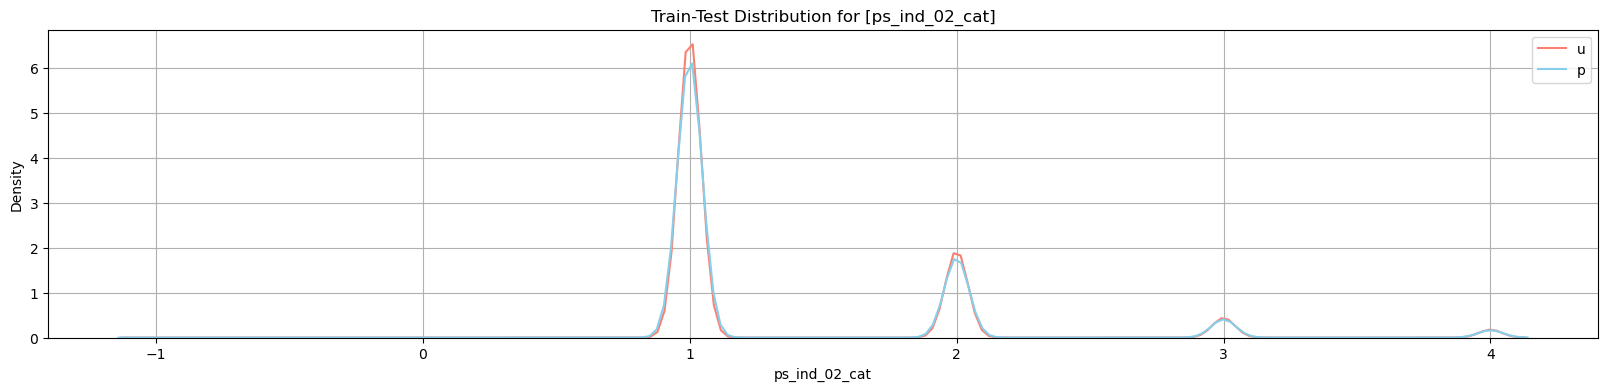

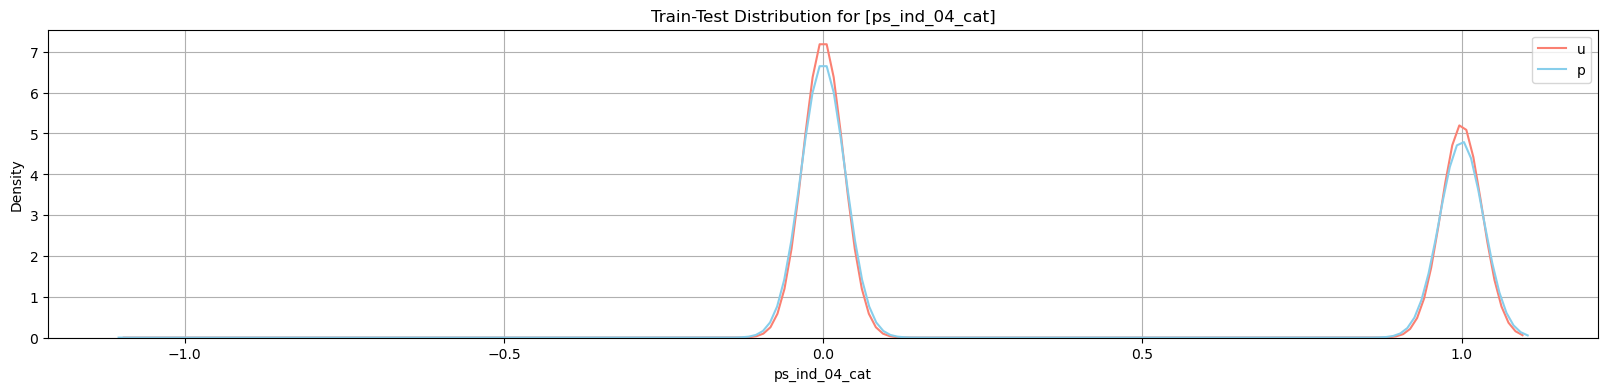

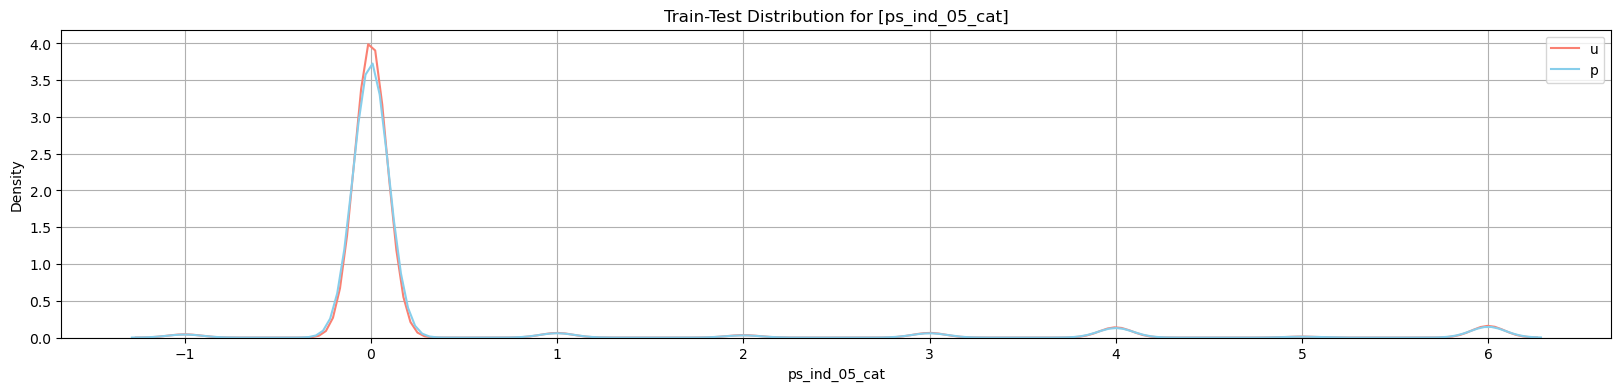

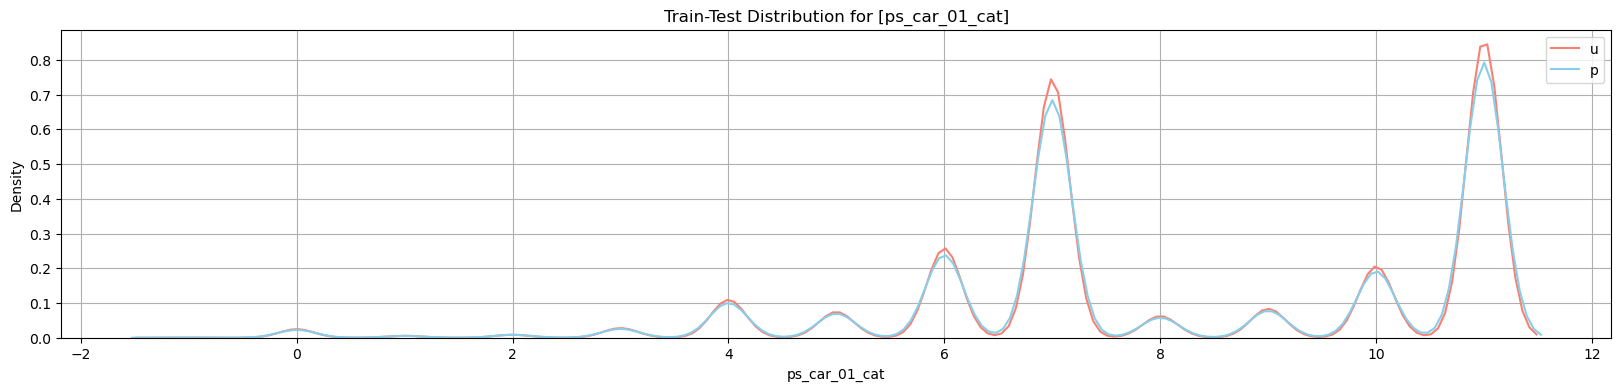

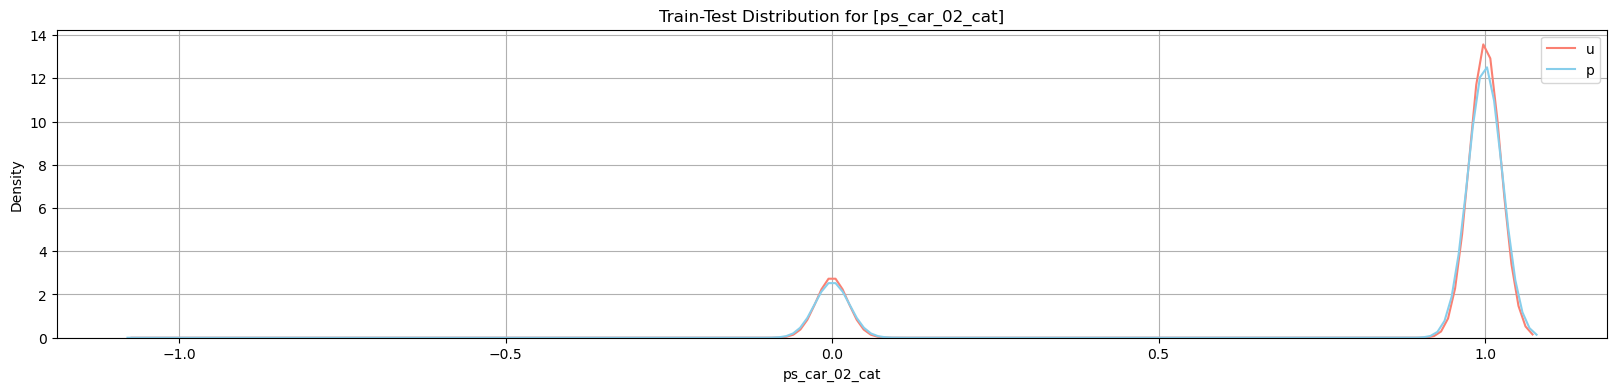

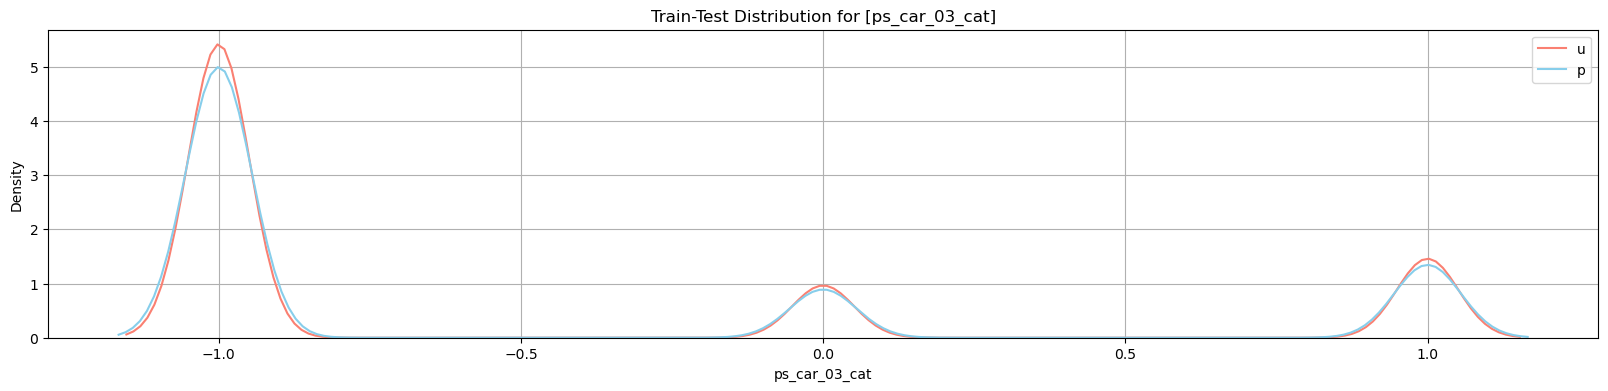

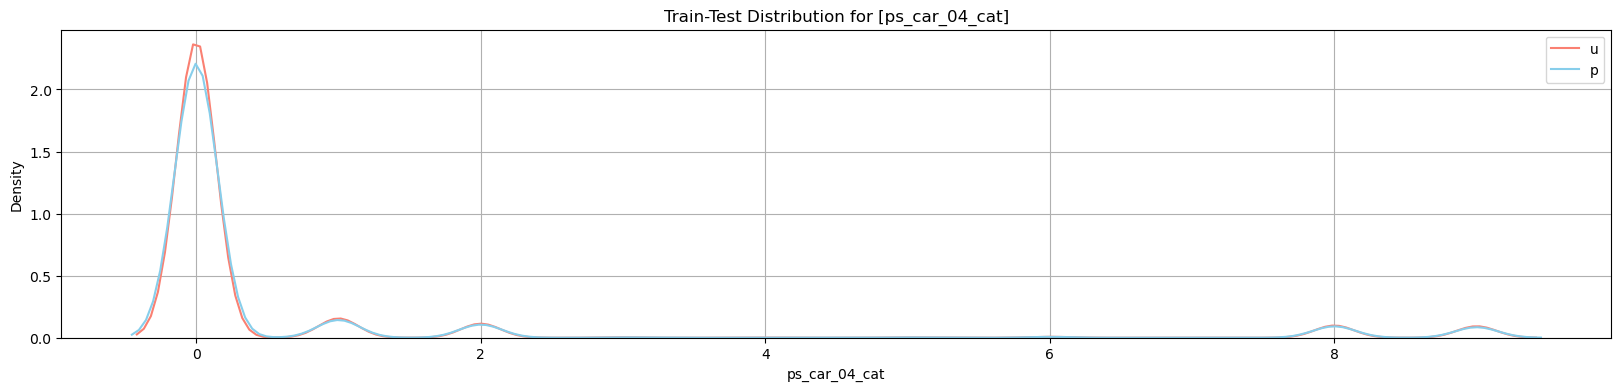

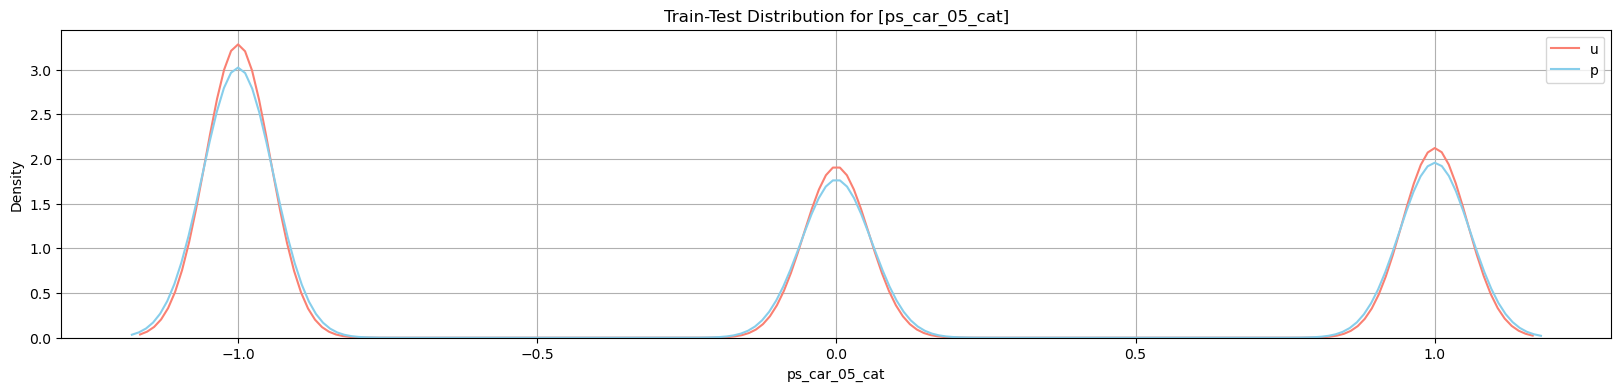

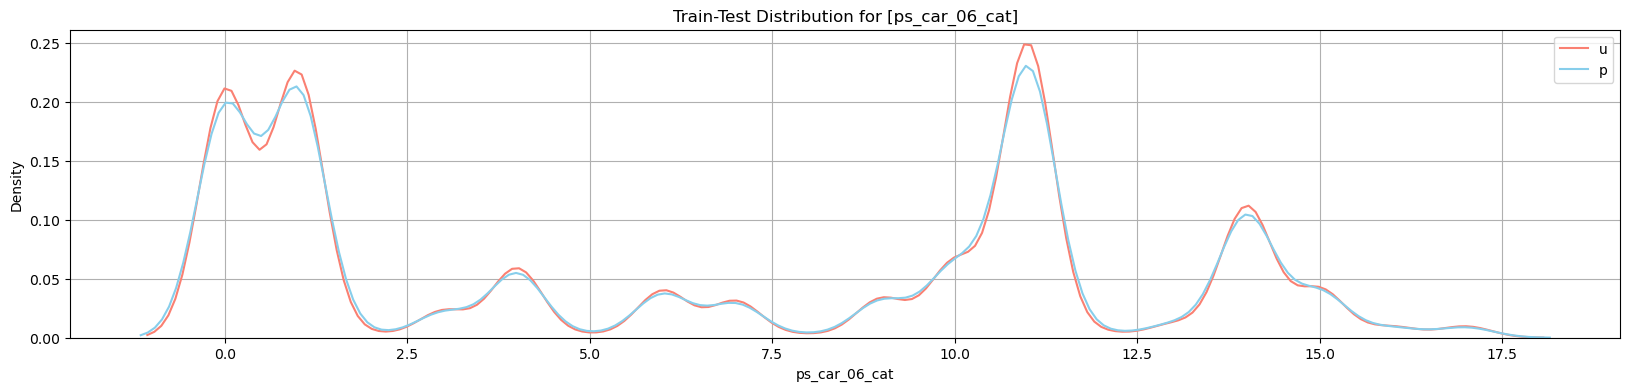

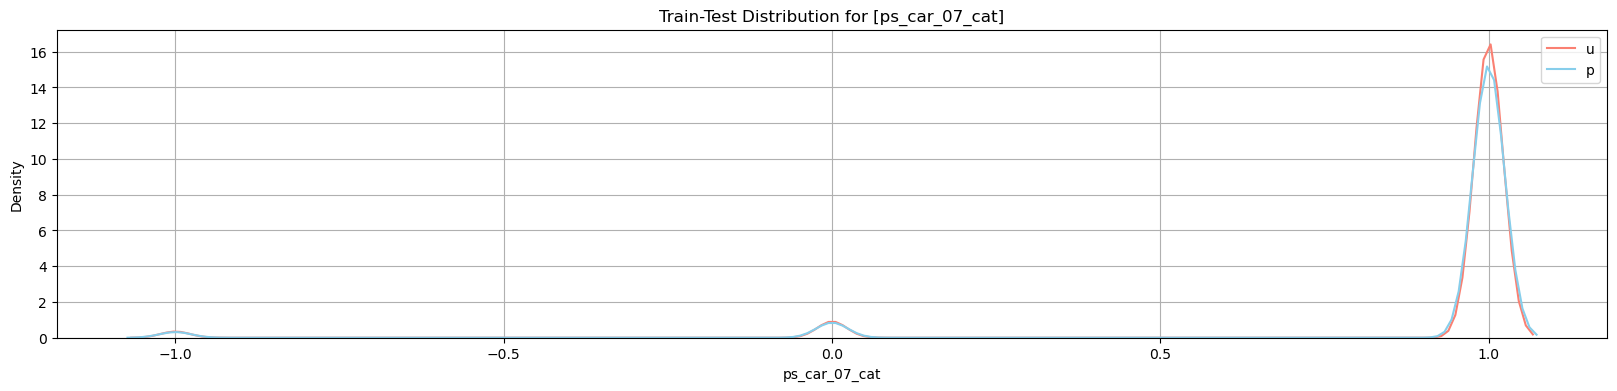

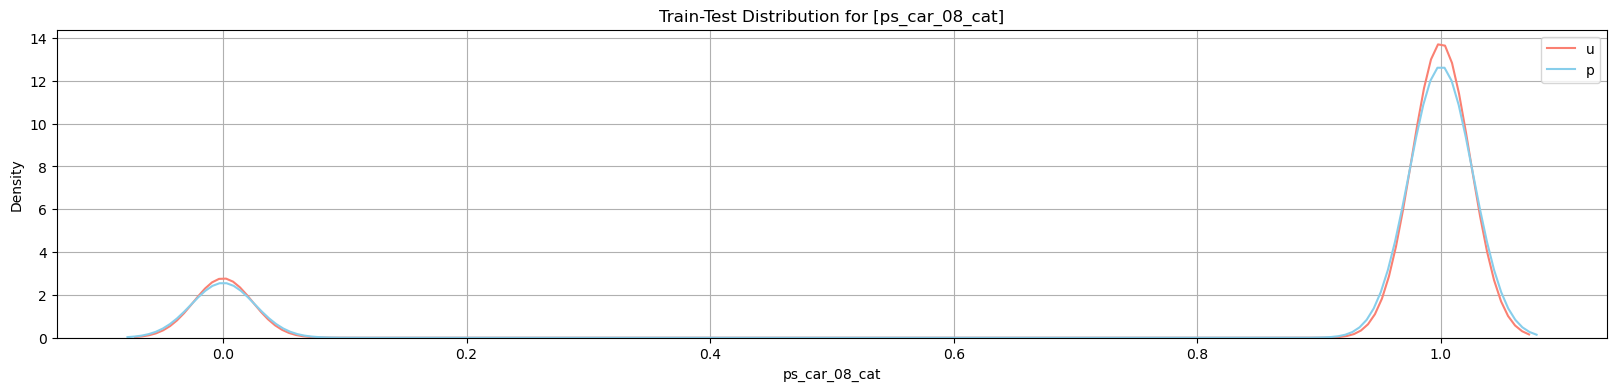

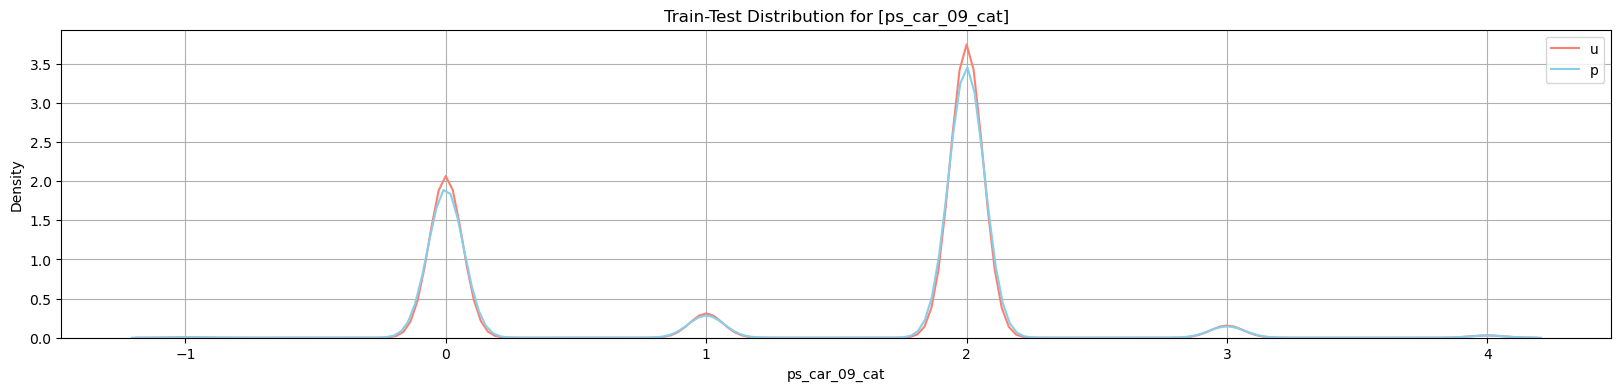

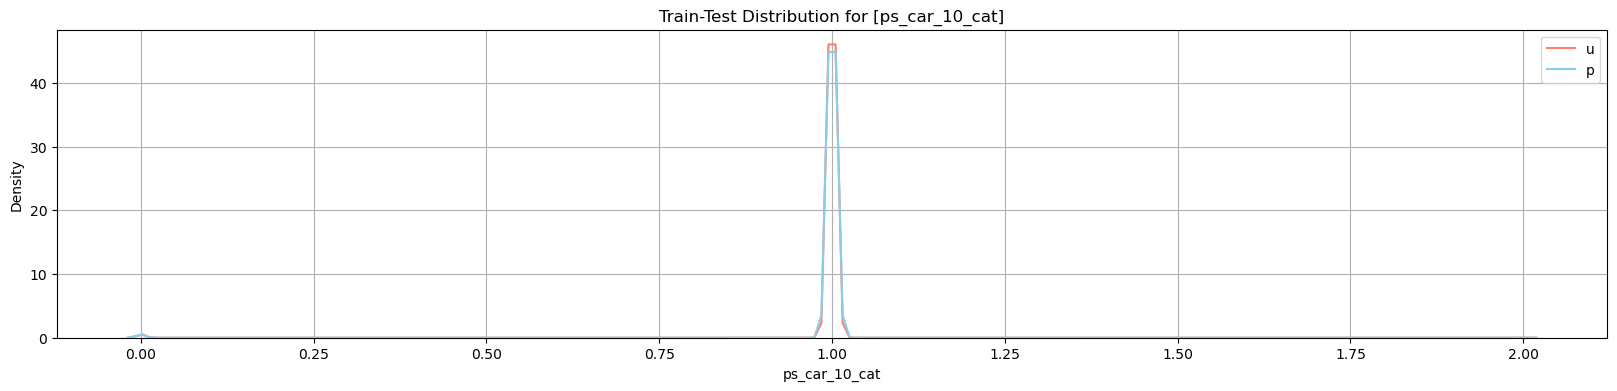

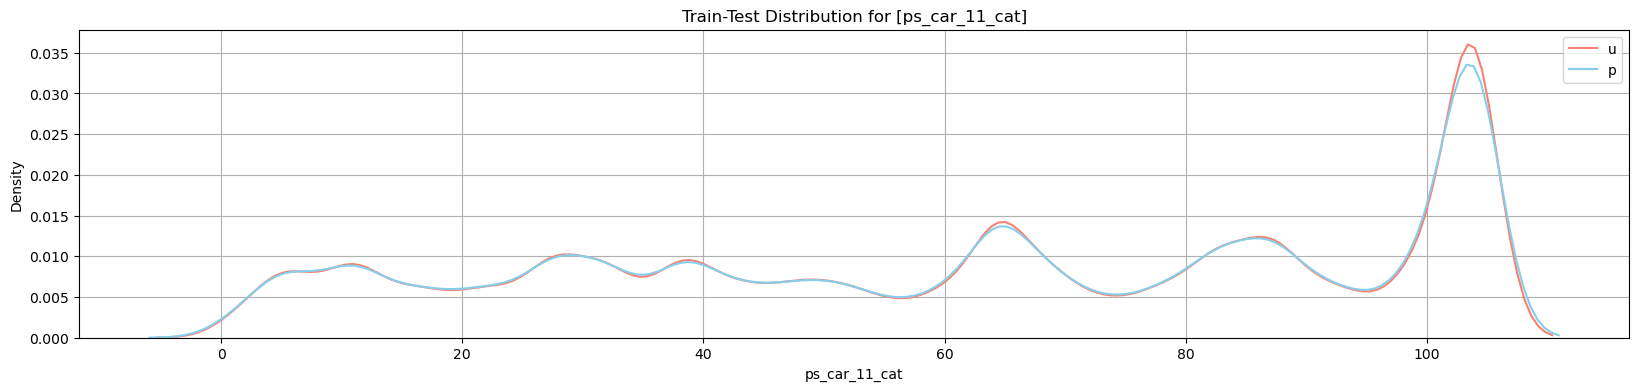

In [36]:
for col in cat_features:
    f, ax = plt.subplots(1,1,figsize=(20, 4))
    g = sns.distplot(full[full[LABEL].isnull()][col], ax=ax, kde=True, hist=False, color="salmon", label="Test")
    g = sns.distplot(full[~full[LABEL].isnull()][col], ax=ax, kde=True, hist=False, color="skyblue", label="Train")
    ax.grid()
    plt.title(f"Train-Test Distribution for [{col}]")
    ax.legend("upper right")
    
    if SAVE_PLOTS:
        plt.savefig(PLOT_DIR.joinpath(f"category-train_test_distributions_{col}.png"))
    else:
        plt.show()

#### Continuous Features [correlation matrix, scatter plots]

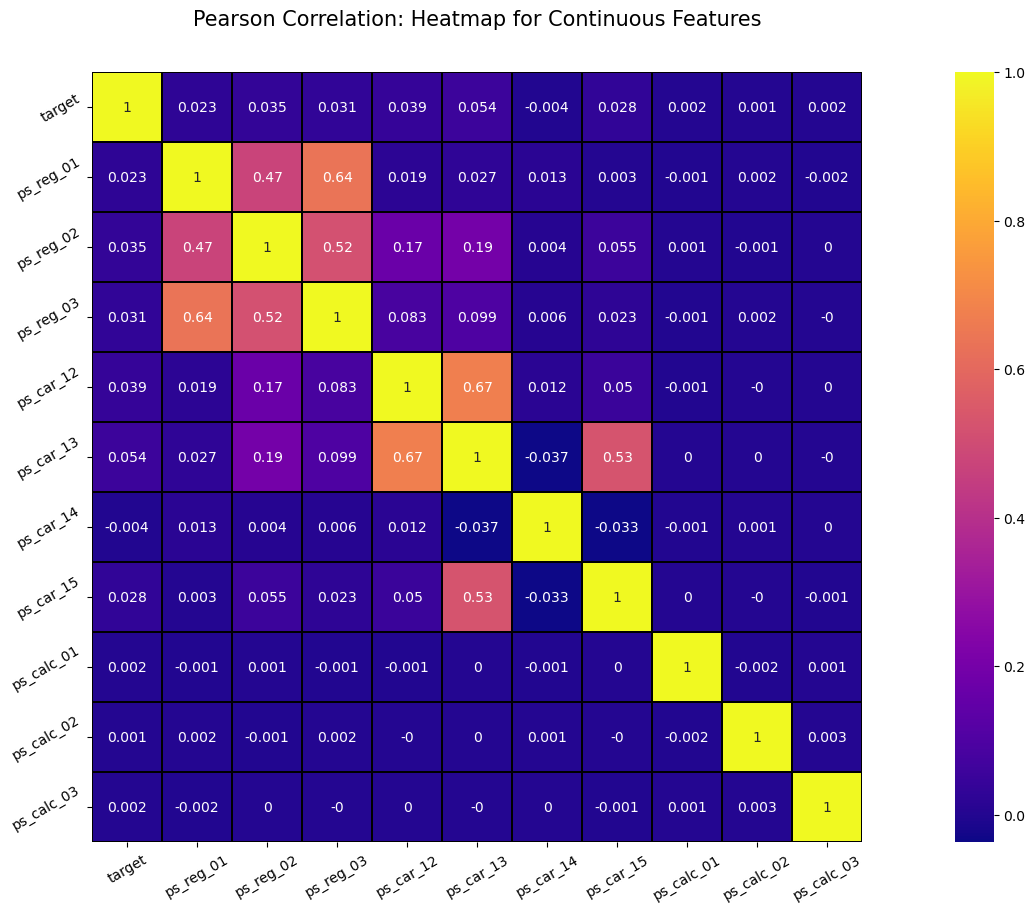

In [44]:
corr_columns = ["target"] + train.select_dtypes(include="float").columns.tolist()

f, ax = plt.subplots(figsize=(24 , 10))
plt.title('Pearson Correlation: Heatmap for Continuous Features', y=1.05, size=15)

sns.heatmap(train[corr_columns].corr().round(3),
            linewidths=0.1,
            vmax=1.0,
            square=True, 
            cmap=plt.cm.plasma,
            linecolor='black',
            annot=True,
           ax=ax)
ax.set_yticklabels(corr_columns, rotation=30)
ax.set_xticklabels(corr_columns, rotation=30)
plt.savefig(PLOT_DIR.joinpath(f"HeatMap-Pearson-Correlation.png"))
plt.show()

In [ ]:
# # Histograms for each feature colored by outcome
# sns.histplot(data=full, x=col, hue=LABEL)

In [102]:
# %%time

# %run src/process.py
# %run src/baseline.py
# %run src/score.py